The Lab of today is material taken from the [UCA Deep Learning School](http://web.univ-cotedazur.fr//events/deep-learning-school)

To build our neural networks, we will use **Keras** which is one of the most used libraries for deep learning. It is capable of running on top of TensorFlow or PyTorch and has the advantage of being easy to handle and to understand, in addition to performing well.

There are two ways to build Keras models: **sequential** and **functional**.


1.   **The sequential API** allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

2.   Alternatively, **the functional API** allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.

[More about the differences between sequential and functional APIs](https://jovianlin.io/keras-models-sequential-vs-functional/)

During this lab, we will use the two approches alternatively.

# I. Multi-Layer Perceptron (MLP)

As all Machine Learning techniques, deep learning is **data centered**. Indeed, in order to train neural networks, we need to provide it a lot of training samples.

In this part, we will use the simple and famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. This dataset of hand-written digits contains 60000+10000 grey level images of size 28x28 pixels.

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png
)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from IPython.display import Image
import tensorflow
print(tensorflow.__version__)
import keras

2.3.0


## Collecting Data

In [4]:
import numpy as np
from keras.datasets import mnist
# load and split data between train and test (the first time you launch this command, it can take some time to effectively download the dataset)
(xTrainRead,yTrainRead),(xTestRead,yTestRead) = mnist.load_data()
print( 'shape of train data: ', xTrainRead.shape)
print( 'shape of test data: ', xTestRead.shape)
print( 'shape of train labels: ', yTrainRead.shape)

shape of train data:  (60000, 28, 28)
shape of test data:  (10000, 28, 28)
shape of train labels:  (60000,)


## Preprocessing
We will **flatten** the data in order to have one dimensionnal vectors as input and **normalize** the values in order to have the same range of values for each of the inputs. Labels will also transformed to categorical labels.

In [5]:
nbClasses = 10 # 10 digits from 0 to 9
import keras.utils
# we will flatten ...
xTrain = xTrainRead.reshape(60000, 784)
xTest = xTestRead.reshape(10000, 784)
# ... and normalize the data (grey levels are integers from 0 to 255)
xTrain = xTrain.astype('float32')/255
xTest = xTest.astype('float32')/255
# original labels corresponds to digits. We transform the labels to categorical labels.
yTrain = keras.utils.to_categorical(yTrainRead, nbClasses)
yTest = keras.utils.to_categorical(yTestRead, nbClasses)

print('shape of yTrain :', yTrain.shape)

shape of yTrain : (60000, 10)


## Your first neural network !



---


In order to test the model we'll build, we need to keep away some data to evaluate our network on unseen data.
We have to split our data to create a **"train"** part and a **"test"** part.
More specificly, in deep learning, we also separate a **"validation"** set to perform small tests during the training. This allow us to check that the network trains correctly.



In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation 
#Let's build a simple neural network using the keras sequential method
model = Sequential()
#topology: input as the size of data, one hidden layer with 20 neurons and usual sigmoid activation
model.add(Dense(20, input_dim=784, activation='sigmoid'))
#softmax for the output using as many neurons as classes (10 in this case)
model.add(Dense(nbClasses, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [7]:
#we need to define the loss function for the training, the optimisation method (RMSprop) and the accuracy as a metric
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

#now, let's train for real the network: only 20 epochs and batch size of 128 (so that an epoch contains 60000/128 iterations)
model.fit(xTrain, yTrain, epochs=20, batch_size=128)

#is it good? we know the truth: yTest and we will compare to the output of the network
score = model.evaluate(xTest,yTest)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0546 - accuracy: 0.7990
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8952
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.9105
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2874 - accuracy: 0.9201
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2617 - accuracy: 0.9261
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2438 - accuracy: 0.9308
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2294 - accuracy: 0.9349
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2174 - accuracy: 0.9380
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2073 - accuracy: 0.9413
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1980 - accuracy: 0.9437

### How to stop the learning ?

In this small example, we decided, as a default behavior, to stop after 20 epochs. Of course this value can be changed. Another way to deal with that is to use **early stopping** criterion. All options are described in the [keras documentation](https://keras.io/api/callbacks/early_stopping/). Feel free to experiment all options!

In [8]:
from keras.callbacks import EarlyStopping

# we define a callback function that will control if the accuracy 
# on the validation set (a part of train set) is not changing more than 10-4 with a patience of 20 iterations
# If the last accuracy value is not the best one, we still keep the last results
# In this example, we extracted 20% of the train set for the validation set that will be used to monitor the convergence.

ourCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

# let's learn the network again !
# We do not know when the training will stop but no more than 2000 epochs.
model.fit(xTrain, yTrain, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])


Epoch 1/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1467 - accuracy: 0.9574 - val_loss: 0.1367 - val_accuracy: 0.9604
Epoch 2/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1433 - accuracy: 0.9583 - val_loss: 0.1375 - val_accuracy: 0.9597
Epoch 3/2000
375/375 [==============================] - 1s 2ms/step - loss: 0.1408 - accuracy: 0.9595 - val_loss: 0.1378 - val_accuracy: 0.9597
Epoch 4/2000
375/375 [==============================] - 1s 2ms/step - loss: 0.1382 - accuracy: 0.9602 - val_loss: 0.1372 - val_accuracy: 0.9597
Epoch 5/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1360 - accuracy: 0.9611 - val_loss: 0.1375 - val_accuracy: 0.9586
Epoch 6/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1339 - accuracy: 0.9615 - val_loss: 0.1367 - val_accuracy: 0.9590
Epoch 7/2000
375/375 [==============================] - 1s 3ms/step - loss: 0.1316 - accuracy: 0.9622 - val_loss: 0.1381 - val_accuracy:

Did you notice that the learning started from the last result? How can you change that?

### Let's test our network!

Now the network has converged, let us compute the accuracy on the test set:

In [12]:
score = model.evaluate(xTest,yTest)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

313/313 [==============================] - 0s 876us/step - loss: 0.1581 - accuracy: 0.9524
accuracy: 95.24%


In order to analyse the results we have obtained, we can use a very common technique which is the **confusion matrix**. It's very usefull to evaluate the quality of the output of a classifier. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. **The higher the diagonal values of the confusion matrix the better**, indicating many correct predictions.

If M if the confusion matrix, the element M[i,j] is equal to the number of observations known to be in group i but predicted to be in group j. We will normalize this matrix so that it is more meaningful.

In [15]:
test_pred = model.predict_classes(xTest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = yTestRead, y_pred = test_pred)
print(cm)

[[ 952    0    3    1    1    7    5    5    5    1]
 [   0 1123    2    1    0    0    2    1    6    0]
 [   9    3  968   16   10    0    3    9   13    1]
 [   3    0   14  956    0   12    1   11   11    2]
 [   0    0    5    1  938    0   10    3    7   18]
 [   3    2    3   15    4  830   10    4   16    5]
 [   6    3    2    1    3   15  925    0    3    0]
 [   0    6   13    9    5    1    1  982    2    9]
 [   3    3    8   11    6   11    2    6  921    3]
 [   5    5    0    7   23    5    0   15   20  929]]


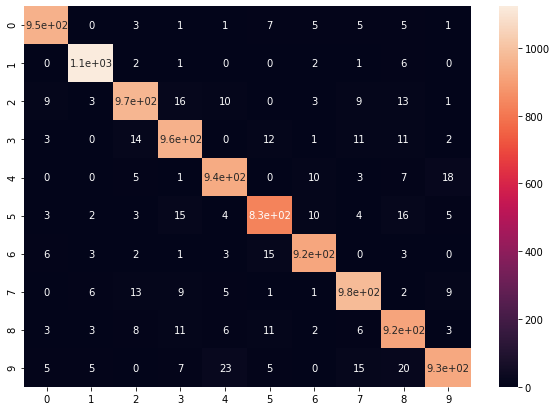

In [16]:
#nicer display:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

You can observe that the diagobal has the highest coefficients. However, some elements outside the diagonal have some importance: there was confusion between 4s and 9s, 3s and 5s, ...



### What are the metrics ?

Different metrics are available in [keras](https://keras.io/api/metrics/). You could also try:


*  'mse'
*  'top_k_categorical_accuracy'

# II.Convolutional Neural Networks (CNN)

Derived from the MLP, a convolutional neural network (CNN) is a type of artificial neural network that is specifically designed to process **pixel data**.  The layers of a CNN consist of an **input layer**, an **output layer** and **hidden layers** that can include **convolutional layers**, **pooling layers**, **fully connected layers** and **normalization layers**. It exists a lot of techniques to optimize CNN, like for example the dropout.



*   **Input layer**

The input of a Convolutional Neural Network is a matrix, which is most of the time a pixelated data (an image). This allows to keep the spacial relationship between pixels. Different CNN architectures can be built according to the different data type (RGB / grayscale images, video, ...). 



*   **Convolutional layer**

The convolution layer is about **sliding small filters** through the whole input to perform **element wise multiplication** in order to capture the most striking features.

The animation below represents the principle of convolution ; the created matrix, on the right, is called feature map. It is generated from the input matrix by sliding a filter and by computing element wise multiplication. As we're using **a multitude of filters to match a multitude of pattern**, a convolutional layer outputs multiple feature maps: the convolution output depth is equal to the quantity of applied filters. The deeper the convolutional layers, the more detailed are the features identified by the activation map.

As you can see in the following GIF, the created feature map has the same dimensions as the input matrix because of some added zeros outside the original image.This technique called **padding** is not mandatory but can be very usefull to avoid decreasing too much the matrix dimension. The way the filter is sliding is conditioned by another parameter called "**stride**".

![convolution](http://www.i3s.unice.fr/~lingrand/dls/conv.gif)


*   **Pooling layers**

Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel.

**Max pooling** and **Average pooling** are the most common pooling functions. Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

This is done to in part to **help over-fitting** by providing an abstracted form of the representation. As well, it reduces the computational cost by **reducing the number of parameters** to learn and provides basic translation invariance to the internal representation.

Animation below is representing "max pooling".

![pooling](http://www.i3s.unice.fr/~lingrand/dls/pooling.gif)



*   **Nornalization layers**

It is common to normalize the input by scaling the samples before training. If the input layer is benefiting from it, why not do the same thing also for the values in the hidden layers, that are changing all the time ? 

Using normalization layers, we can use higher learning rates because batch normalization makes sure that there’s no activation that’s gone really high or really low. And by that, things that previously couldn’t get to train, it will start to train.
It reduces overfitting because it has a slight regularization effects. Similar to dropout, it adds some noise to each hidden layer’s activations. Therefore, if we use batch normalization, we will use less dropout, which is a good thing because we are not going to lose a lot of information. However, we should not depend only on batch normalization for regularization; we should better use it together with dropout.






---


**Source** (For more details, we strongly invite you to read these excellent articles!)

[Guide-To-Understanding-Convolutional-Neural-Networks](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)

[visualizing-parts-of-convolutional-neural-networks](https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59)

[understanding-convnets-cnn](https://medium.com/neuronio/understanding-convnets-cnn-712f2afe4dd3)

[batch-normalization](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c)

[learning-less-to-learn-better](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)


---



## Building the network

You now know all the different ingredients in order to build your own CNN. Many CNN architectures relevant for image classification have published and made available to users. Moreover, already trained weights are also provided. A list of such CNN is available as [keras *applications*](https://keras.io/api/applications/).

If you observe carefully some of these networks, the first part is composed mostrly of *conv*, *pooling* layers and ends with 1 or 2 fully (or *dense*) layers. This can be interpreted as a first part extracted meaningfull informations from images and ending with classification. MNIST images where very small and the description of images we used previously consisted in a flattened array of pixels values.

![intro descriptor](http://www.i3s.unice.fr/~lingrand/dls/introDescriptor.png)

The fully connected layers, ending with softmax, are responsible of the classification. 

The *conv* and *pooling* layers can accepted any dimension of images. However, *dense* layers need a fixed size entries. This is why all images should be resized or rescaled before their entry to any CNN.

You have two options to continue:

*   If you have time, build your own CNN network using the above mentionned ingredients.
*   Use a pretrained CNN network for describing your images and train only the last fully connected layers: this is called *transfert learning* because the weights have been learned using another dataset and you are transferring to your own dataset. As a refinement, you then can refine the whole network. 




In any case, you will need images!

## Loading the dataset for VGG-16
In this part, we will use photographies of animals from the kaggle dataset [animals-10](https://www.kaggle.com/alessiocorrado99/animals10). Please connect to their site before loading the dataset below.

To feed the data to a CNN, we need to shape it as required by Keras. As input, a 2D convolutional layer needs a **4D tensor** with shape: **(batch, rows, cols, channels)**. Therefore, we need to precise the "channels" axis, which can be seen as the number of level of color of each input: 3 channels in our case. We will fix the dimension of images according to th VGG-16 network: (224, 224).


In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import keras
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import glob
#!pip install tqdm
from tqdm import tqdm

In [18]:
# WARNING: do not run this cell now. It is very time consuming. Run the next one and come back here if you have time later.
datasetRoot='https://drive.google.com/drive/folders/1tPckBSc4rccQQmFMaDfaOvC1lOiFd35-?usp=sharing'
classes = ['mucca', 'elefante', 'gatto', 'cavallo', 'scoiattolo', 'ragno', 'pecora', 'farfalla', 'gallina', 'cane']


#training data

rootTrain = datasetRoot+'train/'
classLabel = 0

xTrain = np.empty(shape=(0,224,224,3))
yTrain = []
first = True
for cl in tqdm(classes):
    listImages = glob.glob(rootTrain+cl+'/*')
    yTrain += [classLabel]*100#len(listImages) # note that here ...
    for pathImg in tqdm(listImages[:100]): # and here, we have reduced the data to be loaded (only 100 per class)
        img = image.load_img(pathImg, target_size=(224, 224))
        im = image.img_to_array(img)
        im = np.expand_dims(im, axis=0)
        im = preprocess_input(im)
        xTrain = np.vstack([xTrain, im])
    classLabel += 1
print(len(yTrain))
print(xTrain.shape)
yTrain = keras.utils.to_categorical(yTrain, 10)


100%|██████████| 10/10 [13:04<00:00, 78.47s/it]

1000
(1000, 224, 224, 3)


In [19]:
datasetRoot='/content/drive/My Drive/DLS2020/raw-img/'
classes = ['mucca', 'elefante']#, gatto', 'cavallo', 'scoiattolo', 'ragno', 'pecora', 'farfalla', 'gallina', 'cane']
nbClasses = len(classes)

#training data

rootTrain = datasetRoot+'train/'
classLabel = 0

xTrain = np.empty(shape=(0,224,224,3))
yTrain = []
first = True
for cl in classes:
    listImages = glob.glob(rootTrain+cl+'/*')
    yTrain += [classLabel]*500#len(listImages) # note that here ...
    for pathImg in tqdm(listImages[:500]): # and here, we have reduced the data to be loaded (only 1000 per class)
        img = image.load_img(pathImg, target_size=(224, 224))
        im = image.img_to_array(img)
        im = np.expand_dims(im, axis=0)
        im = preprocess_input(im)
        xTrain = np.vstack([xTrain, im])
    classLabel += 1
print(len(yTrain))
print(xTrain.shape)
yTrain = keras.utils.to_categorical(yTrain, nbClasses)


100%|██████████| 500/500 [02:00<00:00,  4.14it/s]

1000
(1000, 224, 224, 3)


In order to speed-up the time spent on this part of the lab, you may have noticed that we reduced the number of classes and the number of images per class. You can change these few lines of code if you want to work on the whole dataset.

# loading test data

In [20]:
#you will probably need to reduce the test dataset according to the train dataset rules
rootTest = datasetRoot+'test/'
classLabel = 0

xTest = np.empty(shape=(0,224,224,3))
yTest = []

for cl in classes:
    listImages = glob.glob(rootTest+cl+'/*')
    yTest += [classLabel]*len(listImages)
    for pathImg in listImages:
        img = image.load_img(pathImg, target_size=(224, 224))
        im = image.img_to_array(img)
        im = np.expand_dims(im, axis=0)
        im = preprocess_input(im)
        xTest = np.vstack([xTest, im])
    classLabel += 1
print(len(yTest))
print(xTest.shape)
yTest = keras.utils.to_categorical(yTest, 10)

664
(664, 224, 224, 3)


# loading VGG-16 description part and adding layers to build our own classification network

In [21]:
VGGmodel = VGG16(weights='imagenet', include_top=False)
#features = VGGmodel.predict(xTrain)
#print(features.shape)

# we will add layers to this feature extraction part of VGG network
m = VGGmodel.output
# we start with a global average pooling
m = GlobalAveragePooling2D()(m)
# and add a fully-connected layer
m = Dense(1024, activation='relu')(m)
# finally, the softmax layer for predictions (we have nbClasses classes)
predictions = Dense(nbClasses, activation='softmax')(m)

# global network
model = Model(inputs=VGGmodel.input, outputs=predictions)


58892288/58889256 [==============================] - 1s 0us/step


Can you display the architecture of this entire network?

In [ ]:
# training
ourCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 
# training part I: training only the classification part (the end)
for layer in VGGmodel.layers:
    layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback],verbose=1)

# fine-tune the network

Fine-tune the entire network if you have enough computing ressouces, otherwise, carefully choose the layers you want to fine-tune.

In [22]:
for i, layer in enumerate(VGGmodel.layers):
   print(i, layer.name)
#model.summary()

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In this example, we will fine-tune the last convolution block starting at layer number 15 (block5_conv).

In [ ]:
from tensorflow.keras.optimizers import RMSprop
for layer in model.layers[:15]:
   layer.trainable = False
for layer in model.layers[15:]:
   layer.trainable = True
#need to recompile the network
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
#and train again ...
model.fit(xTrain, yTrain, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback],verbose=1)

Epoch 1/2000
7/7 [==============================] - 506s 72s/step - loss: 2.4822 - accuracy: 0.5800 - val_loss: 0.7367 - val_accuracy: 0.4100
Epoch 2/2000
7/7 [==============================] - 506s 72s/step - loss: 0.4270 - accuracy: 0.7912 - val_loss: 0.0639 - val_accuracy: 1.0000
Epoch 3/2000
7/7 [==============================] - 506s 72s/step - loss: 0.7293 - accuracy: 0.8388 - val_loss: 0.1152 - val_accuracy: 1.0000
Epoch 4/2000
3/7 [===========>..................] - ETA: 3:25 - loss: 0.2866 - accuracy: 0.8594

You already know how to evaluate the performances on the test dataset and display the confusion matrix. You can also modify the code that loads the test dataset in order to reduce it's size. Let's do it!

In [ ]:
#enter here your code for evaluation of performances

# III. Object Detection

In [ ]:
!wget --no-check-certificate -r 'http://www.i3s.unice.fr/~sanabria/files/DLS-2020-Object-Detection.zip' -O folder.zip
!mkdir DLS-2020-Object-Detection/
!unzip -qq folder.zip -d DLS-2020-Object-Detection/
!rm folder.zip

# Introduction

In the lab of today we will explore different algorithms for Object Detection, Instance Segmentation and Semantic Segmentation on images.

One of the most popular task of computer vision is **image Classification**, i.e. telling which object appears on a picture. However, sometimes it's not enough to know what's in an image, we might need to know where the object is in the image.

**Object Detection** opens up the capability of counting how many objects are in a scene, tracking motion or simply just locating an object’s position. 

The output of an object detector is an array of bounding boxes around objects detected in the image or video frame, but we do not get any clue about the shape of the object inside the bounding box. **Instance Segmentation** includes identification of boundaries of the objects at the detailed pixel level. 

On the other hand, **Semantic Segmentation** achieves fine-grained inference by making dense predictions inferring labels for every pixel of the image, so that each pixel is labeled with the class of its enclosing object or region.

<!---!<img src="https://cdn-images-1.medium.com/max/800/1*Y40V8ZZ9T_XI-eGQulwIRQ.png"/>--->

<img src="https://cdn-images-1.medium.com/max/600/1*-zw_Mh1e-8YncnokbAFWxg.png" />

**Classification**: There is a balloon in this image. **Semantic Segmentation**: These are all the balloon pixels. **Object Detection**: There are 7 balloons in this image at these locations. We’re starting to account for objects that overlap. **Instance Segmentation**: There are 7 balloons at these locations, and these are the pixels that belong to each one.



---






# Part I: Object Detection

In the first part of this lab we will explore Faster R-CNN  ([Ren et al., 2016](http://openaccess.thecvf.com/content_iccv_2015/papers/Girshick_Fast_R-CNN_ICCV_2015_paper.pdf)) algorithm, since it is one of the famous object detection architectures that uses convolution neural networks and it is also a good example to show how object detection solutions have evolved.

In the folder *DLS-2020-Object-Detection/images* there are some images with which you can play for the object detection and instance segmentation tasks but feel free to add more images to this folder. You can modify the variable *image_name* with the image you want to try.

Throughout the lab there are lines of code empty for you to complete.

## R-CNN

In 2014, [Girshick et al.](https://openaccess.thecvf.com/content_cvpr_2014/papers/Girshick_Rich_Feature_Hierarchies_2014_CVPR_paper.pdf) proposed R-CNN (Region-based Convolutional Neural Networks).  

From an input image, ~2000 bounding boxes are generated using [Selective Search](http://www.huppelen.nl/publications/selectiveSearchDraft.pdf), these bounding-boxes represent region proposals ("Region of Interest" or "RoI"). 

Those proposed regions are cropped and warped to a fixed size. A pre-trained CNN model (like VGG or ResNet) is then used to extract a feature vector for each warped region independently. 

Then an SVM model is trained to classify the object in the warped image using the feature vector. A regression layer is also trained to refine the bounding box proposals 

<!---![](https://lilianweng.github.io/lil-log/assets/images/RCNN.png)--->
<!---![](https://www.deeplearningitalia.com/wp-content/uploads/2018/06/2.png )--->
<img src="https://www.deeplearningitalia.com/wp-content/uploads/2018/06/2.png" width="500" />

However, training R-CNN is expensive and slow. Running selective search to propose 2000 regions for every image and then generate the CNN fetatures for every region in the image, takes a lot of time.

Let's see how long it will take to genereate the CNN features of 2000 region proposals. 

In the following code we will not take into account the time of the Selective Search, for this reason, we will simulate this process generating random regions of the image. Then we will count the time a pre-trained CNN like ResNet takes to generate the features.

We will use Keras API to load the pre-trained ResNet and to extract the features.



In [ ]:
import time
import cv2
from random import randint
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import numpy as np

image_name = ""# To Complete
image_location = "/content/DLS-2020-Object-Detection/images/"+image_name
im = cv2.imread(image_location) ## Reading image
im_h = im.shape[0]
im_w = im.shape[1]
n_proposals = 2000

region_props = []
input_size = 224 ## ResNet only accepts inputs of 224x224, to make it easier we will only generate region proposal of this size

## The region proposals are small regions of the image. We will define this region as a set of 4 points [x_0, y_0, x_1, y_1]. 
## For instance, if the image size is 500x500, a region proposal might be [0, 0, 224, 224] which is the 224x224 top left corner area of the image. 

## Let's create random region proposals in order to simulate the Selective Search process
## Hint: You can use the function randint(init, end) to generate randomly an integer between init and end
for i in range(n_proposals):  
  
  x_0 = randint(0, im_w - input_size) 
  y_0 = randint(0, im_h - input_size)
  x_1 = x_0 + ... ## To Complete
  y_1 = y_0 + ... ## To Complete
  region_props.append([x_0, y_0, x_1, y_1])


## Now let's generate the CNN features for each of this region proposals
CNN_model = ResNet50(weights='imagenet') #Load ResNet model pre-trained with ImageNet dataset
t = time.time()
batch_size = 100 # The CNN model processes batch_size number of images at the same time
X = np.zeros((batch_size, input_size, input_size, 3))
b = 0
for prop in region_props:
  
  img_to_pred = im[prop[1]:prop[3],prop[0]:prop[2]] # Select the proposal from the image
  img_to_pred = np.expand_dims(img_to_pred, axis=0) # Add the batch dimension. From (input_size, input_size, 3) to (1, input_size, input_size, 3)
  img_to_pred = preprocess_input(img_to_pred) # convert the images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset
  if b == batch_size:
    CNN_model.predict(X) # Extract features
    b = 0
    X = np.zeros((batch_size, input_size, input_size, 3))    
  X[b] = img_to_pred
  b += 1

print('Time to generate features for one image: {:.3f}s'.format(time.time() - t))

## Fast R-CNN

To improve R-CNN,  [Girshick et al., 2015](http://openaccess.thecvf.com/content_iccv_2015/papers/Girshick_Fast_R-CNN_ICCV_2015_paper.pdf) proposed Fast R-CNN. Instead of extracting CNN features independently for each region proposal, this model only needs one CNN forward pass per image since the features of the regions are extracted from the feature map of the entire image.

<img src="https://www.deeplearningitalia.com/wp-content/uploads/2018/06/3-1.png" width="500" />
<!---![](https://www.deeplearningitalia.com/wp-content/uploads/2018/06/3-1.png)--->

The following steps summarize the method:

1. Propose regions (Regions of Interest or "RoIs") by Selective Search
2. Take a pre-trained CNN like VGG or ResNet and replace the last Max Pooling layer by a RoI Pooling layer:
  
  The inputs of the RoI Pooling layer are the different region proposals projected in the feature map of the entire image and the output is a fixed-length feature vector per proposal. In other words, if we compare R-CNN with Fast R-CNN: R-CNN extracts the region proposals from the original images, warpes them in a fixed size and passes each of these small images to the pre-trained CNN. On the other hand, Fast-RCNN passes only one time the entire image to the pre-trained CNN to obtain a feature map, then it extracts the region proposals from this feature map and use RoI pooling to get fixed size regions.
3. Finally, from the fixed-length feature vector per proposal, the model branches into two output layers:
  *   A softmax estimator where the output is a discrete probability distribution per RoI.
  *   A bounding-box regression model which predicts offsets relative to the original RoI.

Fast R-CNN performs much better than R-CNN in terms of speed. There was just one big bottleneck remaining: the selective search algorithm for generating region proposals.

###RoI Pooling
It is a type of Max Pooling which goal is to convert features of any size (h x w), into a small fixed window, (H x W). The input region is divided into H x W grids, approximately every subwindow of size h/H x w/W. Then apply max-pooling in each grid.

<img src="https://cdn-images-1.medium.com/max/800/1*aB4gy6i8Zc3BasYaQGDVtg.png" width="800" />




Now let's see how long it takes the Selective Search algorithm in one image.

In [ ]:
%cd /content/DLS-2020-Object-Detection/selectivesearch
!pip install selectivesearch # Selective Search algorithm taken from https://github.com/AlpacaDB/selectivesearch

In [ ]:
import selectivesearch
import time
import cv2

image_name = "" # To Complete
image_location = "/content/DLS-2020-Object-Detection/images/"+image_name

im = cv2.imread(image_location) # Read the image
t = time.time()
img_lbl, regions = selectivesearch.selective_search(im)
print('Time for Selective search on one single image: {:.3f}s'.format(time.time() - t))

## Faster R-CNN##
An intuitive speedup solution is to integrate the region proposal algorithm into the CNN model. Faster R-CNN  ([Ren et al., 2016](http://openaccess.thecvf.com/content_iccv_2015/papers/Girshick_Fast_R-CNN_ICCV_2015_paper.pdf)) constructs a single, unified model composed of RPN (Region Proposal Network) and Fast R-CNN with shared convolutional feature layers. 

Instead of using Selective Search, Ren et al. proposed to let the network learn the region proposals using RPN.

<img src="https://lilianweng.github.io/lil-log/assets/images/faster-RCNN.png" width="700" />


The following steps describe how the RPN model works:

1. Take a pre-trained CNN like VGG or ResNet. At the last layer of the CNN, a 3×3 sliding window moves across the feature map.
2. At the center of each sliding window, it predicts multiple regions of various scales and ratios simultaneously. 
3. For each region proposal the model predicts: a score for that region, and 4 coordinates representing the bounding box of the region.

The 2k scores represent the softmax probability of each of the k bounding boxes being an “object”. Although the RPN outputs bounding box coordinates, it does not try to classify any potential object. Its real job is still proposing object regions. If an anchor box has a score above a certain threshold, that box passes forward as a region proposal.

Once we have the region proposals, we get the fixed length feature vector using a RoI pooling layer. These feature vectors are then used to classify the proposals and predict the offset values for the bounding boxes. In other workds, Faster R-CNN = RPN + Fast R-CNN.










Tosee the results of RPN and Faster R-CNN, we will use [Detectron](https://github.com/facebookresearch/Detectron), which  is Facebook AI Research's software system, written in Python and powered by the Caffe2 deep learning framework.


In [ ]:
%cd /content/DLS-2020-Object-Detection/cocoapi/PythonAPI
!make install
!python setup.py install --user
%cd /content/DLS-2020-Object-Detection/detectron
!make  

In the following code, you can choose the image you want to predict. As mentioned before, in the folder */content/DLS-2020-Object-Detection/images* there are some images for you to test but we encourage you to add more. You can modify the variable *image_name* with the image you want to try.


First, we will take a look to the output of **RPN**. The goal of RPN is to predict region proposals, which are regions where  there is possibly an object.

In [ ]:
image_name = "8.jpg"
image_location = "/content/DLS-2020-Object-Detection/images/"+image_name
%cd /content/DLS-2020-Object-Detection/detectron
!python tools/infer_rpn.py \
    --im $image_location \
    --rpn-cfg configs/12_2017_baselines/rpn_R-50-C4_1x.yaml \
    --rpn-pkl models/rpn.pkl

from IPython.display import Image
Image("/tmp/"+image_name)

Now, we will see the results of Faster R-CNN. 
Faster R-CNN, takes the region proposals predicted by the RPN and classifies them in the right class. 

In [ ]:
image_name = "8.jpg"
image_location = "/content/DLS-2020-Object-Detection/images/"+image_name
%cd /content/DLS-2020-Object-Detection/detectron

!python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/e2e_faster_rcnn_R-101-FPN_2x.yaml \
    --image-ext jpg \
    --wts models/faster_rcnn.pkl \
$image_location
 
from IPython.display import Image
Image("/tmp/"+image_name)

##Context R-CNN##

Recently, Beery et al. proposed [Context R-CNN](https://arxiv.org/pdf/1912.03538.pdf), a method for static monitoring cameras. This method can detect objects in two different contexts:

*   **Camera traps**: used by biologists to study animal species occurrence,populations, and behavior. Monitoring biodiversity quantitatively can help us understand the connections between  species decline and pollution, exploitation, urbanization, global warming, and policy.
*   **Traffic cameras**:  used to monitor roadways and intersections in order to analyzetraffic patterns and ensure city safety.

Context R-CNN leverages up to a month’s worth of images from the same camera for context to determine what objects might be present and identify them. 

In the following image, we can see how additional examples from the same scene help experts determine that the object is an animal and not background. Context such as the shape and size of the object, its attachment to a herd, and habitual grazing at certain times of day help determine that the species is a wildebeest.

<img src="https://1.bp.blogspot.com/-PJxZGdDg2CQ/XvTcfv7MO9I/AAAAAAAAGKo/7zEBw-Qp4XA2Q-vffmYyNoXs2v1tyYoWwCLcBGAsYHQ/s640/image2.png" width="600" />

Context R-CNN is an adaptation of Faster R-CNN. To extract context for a camera, they first use a frozen feature extractor to build up a contextual memory bank from images across a large time horizon (up to a month or more). Next, objects are detected in each image using Context R-CNN which aggregates relevant context from the memory bank to help detect objects under challenging conditions (such as the heavy fog obscuring the wildebeests in our previous example). This aggregation is performed using attention, which is robust to the sparse and irregular sampling rates often seen in static monitoring cameras. 

<!-- The first stage of Faster R-CNN proposes potential objects, and the second stage categorizes each proposal as either background or one of the target classes. In Context R-CNN, they take the proposed objects from the first stage of Faster R-CNN, and for each one we use similarity-based attention to determine how relevant each of the features in the memory bank (M) is to the current object, and construct a per-object context feature by taking a relevance-weighted sum over M and adding it back to the original object features. Then each object, now with added contextual information, is finally categorized using the second stage of Faster R-CNN.  -->

<img src="https://1.bp.blogspot.com/-HucWjMOChHk/XvTcuRir9nI/AAAAAAAAGK0/SfhWxyARqdI5FrvNntwjNnafvBxYk8fhgCLcBGAsYHQ/s640/image4.png" width="600" />

Context R-CNN is able to leverage context to correctly categorize the challenging wildebeest example we saw above. The green values are the corresponding attention weights for each boxed object.

The code of this section is inspired on the information provided [here](https://ai.googleblog.com/2020/06/leveraging-temporal-context-for-object.html?m=1)




In [ ]:
!pip install tf_slim
!pip install pycocotools

In [ ]:
%cd /content/DLS-2020-Object-Detection/Context_RCNN/
!protoc object_detection/protos/*.proto --python_out=.
!pip install object_detection

In [ ]:
%cd /content/DLS-2020-Object-Detection/Context_RCNN/
import pathlib
import label_map_util
import json

PATH_TO_LABELS = 'snapshot_serengeti_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=False)

# If you want to test the code with your images, just add path to the images to
# the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('test_images/snapshot_serengeti')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpeg")))

test_data_json = 'test_images/snapshot_serengeti/context_rcnn_demo_metadata.json'
with open(test_data_json, 'r') as f:
  test_metadata = json.load(f)
  
image_id_to_datetime = {im['id']:im['date_captured'] for im in test_metadata['images']}
image_path_to_id = {im['file_name']: im['id'] 
                    for im in test_metadata['images']}
image_path_to_id

First, we will load the Faster R-CNN model with ResNet as pre-trained CNN.

In [ ]:
from functions import load_model
faster_rcnn_model_name = 'faster_rcnn_resnet101_snapshot_serengeti_2020_06_10'
faster_rcnn_model = load_model(faster_rcnn_model_name)

Then, we will generate the "context" features of each image, using Faster R-CNN

In [ ]:
from functions import run_inference
import numpy as np

context_features = []
scores = []
faster_rcnn_results = {}
for image_path in TEST_IMAGE_PATHS:
  image_id = image_path_to_id[str(image_path)]
  date_captured = image_id_to_datetime[image_id]
  context_feature, score, results = run_inference(
      faster_rcnn_model, image_path, date_captured)
  faster_rcnn_results[image_id] = results
  context_features.append(context_feature)
  scores.append(score)

# Concatenate all extracted context embeddings into a contextual memory bank.
context_features_matrix = np.concatenate(context_features, axis=0)

Load a context r-cnn object detection model:

In [ ]:
context_rcnn_model_name = 'context_rcnn_resnet101_snapshot_serengeti_2020_06_10'
context_rcnn_model = load_model(context_rcnn_model_name)

Now we can run Context R-CNN inference and compare results to Faster R-CNN.

In [ ]:
import matplotlib.pyplot as plt
from functions import show_context_rcnn_inference

%matplotlib inline
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [15,10]

context_padding_size = 2000
for image_path in TEST_IMAGE_PATHS:
  image_id = image_path_to_id[str(image_path)]
  faster_rcnn_output_dict = faster_rcnn_results[image_id]
  context_rcnn_image, faster_rcnn_image = show_context_rcnn_inference(
      context_rcnn_model, image_path, context_features_matrix,
      faster_rcnn_output_dict, context_padding_size, category_index)
  plt.subplot(1,2,1)
  plt.imshow(faster_rcnn_image)
  plt.title('Faster R-CNN')
  plt.subplot(1,2,2)
  plt.imshow(context_rcnn_image)
  plt.title('Context R-CNN')
  plt.show()

##YOLO##

Although R-CNNs tend to be very accurate, the biggest problem with the R-CNN family of networks is their speed, they were able to predict at only 5 FPS. This is mainly due to the fact that they have two stages, one for the proposals and the second for the classification.

To help increase the speed of deep learning-based object detectors, both Single Shot Detectors (SSDs) and YOLO use a one-stage detector strategy. In general, single-stage detectors tend to be less accurate than two-stage detectors but are significantly faster.

In this lab, we will take a look to [YOLO](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf) (You Only Look Once: Unified, Real-Time Object Detection). This algorithm can be used for real-time detection, since it predicts at 45 FPS.

YOLO first divides the input image into grids (let's say 3x3 to make a simpler illustration). And then for each grid, it predicts the bounding boxes and the corresponding class probabilities for objects.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-15-17-46-32.png" />

The following illustration shows the ground truth representation of each grid. Assuming we divide the image into a grid of size 3x3 and there are 3 classes: Pederastian, Car and Motorcycle, the label *y* of each grid will be an eight dimensional vector.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-15-18-01-24.png" />

*   pc defines whether an object is present in the grid or not. This value is 1 if the grid contains the midpoint of the object.
*   bx, by, bh, bw specify the bounding box if there is an object. Where bx and by are the x and y coordinates of the midpoint of the object with respect to the current grid.
*   c1, c2, c3 represent the classes. So, if the object is a car, c2 will be 1 and c1 & c3 will be 0.

Even if an object spans out to more than one grid, it will only be assigned to a single grid in which its mid-point is located.

**Anchor Boxes**
As we said before, each grid can only identify one object. But what if there are multiple objects in a single grid? Consider as an example the following image, divided into a 3 X 3 grid:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-17-13-20-41.png"/>

YOLO assigns an object to a grid if the midpoint of the object is located in this grid. But in the above example, the midpoint of both objects lies in the same grid. To solve this issue, the algorithm pre-defines two different shapes called anchor boxes or anchor box shapes. Now, for each grid, instead of having one output, it will have two outputs. We can always increase the number of anchor boxes as well, I have taken two here to make the concept easy to understand:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-17-13-36-28.png"/>

The, the *y* label with 2 anchor boxes looks like:

 <img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-17-13-33-31.png"/>

**Intersection over Union**

How can we evaluate the predicted bounding box? Intersection over Union (IoU) computes the intersection over the union between the actual bounding box and the predicted one. Consider the actual (red) and the predicted (blue) bounding boxes for a car as shown below. 

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-16-13-07-50.png" height=300/> <img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-16-13-12-02.png" height=300/>

IoU = Area of the yellow box (Intersection) / Area of the green box (Union)

Then the prediction is good enough if the IoU is greater than a threshold.

Let's create a function to find the IoU of two boxes

**Requirements:** To use YOLO we will need tensorflow 1.14

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14
!pip install keras==2.3.0
import os
os.kill(os.getpid(), 9)

In [ ]:
def iou(box1, box2):
  ## box = [x1, y1, x2, y2] where x1, y1 is the top left corner of the box and x2, y2 is the bottom right corner of the box
  
  # determine the (x, y)-coordinates of the intersection rectangle
  xi1 = max(box1[0], box2[0])
  yi1 = max(box1[1], box2[1])
  xi2 = min(box1[2], box2[2])
  yi2 = min(box1[3], box2[3])
  
  # compute the area of intersection rectangle
  inter_area = max(0, yi2 - yi1) * max(0, xi2 - xi1)
  
  box1_area = (box1[3] - box1[1]) * (box1[2] - box1[0])
  box2_area = (box2[3] - box2[1]) * (box2[2] - box2[0])
  
  # compute the intersection over union by taking the intersection area and dividing it by the box1 area + box2 area - the interesection area
  union_area = box1_area + box2_area - inter_area
  
  iou = inter_area / float(union_area)

  return iou

Now, we can see if our function is correct. First, we can try with two identical boxes, the IoU should be 1.

In [ ]:
box1 =[0, 1, 2, 3] 
box2 = [0, 1, 2, 3]
print(iou(box1, box2))

In the following code, we can find the IoU of two boxes with no intersection. The IoU should be 0.

In [ ]:
box1 = # To Complete
box2 = # To Complete
print(iou(box1, box2))

And now, if we try with two boxes with some intersection, the IoU should be between 0 and 1

In [ ]:
box1 = # To Complete
box2 = # To Complete
print(iou(box1, box2))

**Non-Maximum Suppression**

One of the most common problems with object detection algorithms is that rather than detecting an object just once, they might detect it multiple times. Take as an example the image below:

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-16-13-32-40.png" /> 

In the previous image, there are multiple boxes detecting the same car. The Non-Max Suppression technique tries to clean up this prediction to get only a single detection per object. 

It first takes the detection with highest probability. In the above image, it will select the bounding box with 0.9 prediction. Then it will supress the boxes with high IoU with respect to the previoulsy selected one. So, the boxes with 0.6 and 0.7 probabilities will be suppressed in our example.

In the following code, we will create a nms function. But, it is important to modify our previous IoU function. The IoU function created before, finds the IoU between two boxes, but we would like to find the IoU between one box and several others. 

In [ ]:
import numpy as np
def iou(box, boxes):
  ## box = [x1, y1, x2, y2] where x1, y1 is the top left corner of the box and x2, y2 is the bottom right corner of the box
  ## boxes = N x [xn1, yn1, xn2, yn2]
  
  # determine the (x, y)-coordinates of the intersection rectangles
  xi1 = np.maximum(box[0], boxes[:, 0])
  yi1 = ...# To Complete
  xi2 = np.minimum(box[2], boxes[:, 2])
  yi2 = ...# To Complete
  
  # compute the area of intersection rectangles
  inter_areas = np.maximum(0, yi2 - yi1) * np.maximum(0, xi2 - xi1)
  
  box_area = (box[3] - box[1]) * (box[2] - ...)# To Complete
  boxes_area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
  
  # compute the intersection over union by taking the intersection area and dividing it by box area + boxes area - interesection areas
  union_areas = ...# To Complete
  
  iou = inter_areas / union_areas

  return iou

In [ ]:
import numpy as np
 
# Malisiewicz et al.
def nms(boxes, scores, overlapThresh):
  
  # if there are no boxes, return an empty list
  if len(boxes) == 0:
    return []

  # initialize the list of picked indexes	
  pick = []
  
  # Sort the indices by the score
  idxs = np.argsort(scores)

  # keep looping while some indexes still remain in the indexes list
  while len(idxs) > 0:

    # Choose the index with highest score and add the index value to the list of picked indexes
    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)
    
    # Get the IoU between the box with highest score and the boxes remained in the indexes list
    overlap = iou(boxes[i], boxes[idxs[:last]])

    # delete all indexes from the index list that have overlap > overlapThresh
    idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

  # return only the indices of the bounding boxes that were picked
  return np.asarray(pick)

Now, we can see the results of YOLO. It takes an input image of shape (608, 608, 3), passes this image to a convolutional neural network (CNN), which returns a (19, 19, 425) dimensional output.

In [ ]:
%cd /content/DLS-2020-Object-Detection/yolo

from keras.models import load_model
from yolo_utils import preprocess_image, read_classes, read_anchors
import time

# Load pre-trained YOLO model in COCO dataset
yolo_model = load_model("model_data/yolo.h5")

# You can also choose an image from /content/DLS-2020-Object-Detection/images
img_path = "test2.jpg"

image, image_data = preprocess_image(img_path, model_image_size = (608, 608))
width_image, height_image = image.size

start_time = time.time()
yolo_outputs = yolo_model.predict(image_data)
print("YOLO Predcition time per image:", time.time() - start_time)
print(yolo_outputs.shape)


Here, each cell of a 19 X 19 grid returns 425 numbers

425 = 5 * 85, where 5 is the number of anchor boxes per grid

85 = 5 + 80, where 5 is (pc, bx, by, bh, bw) and 80 is the number of classes we want to detect


<img src="https://raw.githubusercontent.com/enggen/Deep-Learning-Coursera/1407e19c98833d2686a0748db26b594f3102301e/Convolutional%20Neural%20Networks/Week3/Car%20detection%20for%20Autonomous%20Driving/nb_images/flatten.png" /> 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from yolo_utils import yolo_boxes_to_corners, scale_boxes, yolo_head, generate_colors, draw_boxes

# Get the class names and the anchors
class_names = read_classes("model_data/coco_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")

print("Classes:", class_names)
print("Number of classes:", len(class_names))
print("Number of anchors:", len(anchors))

## Convert final layer features to bounding box parameters
# box_confidence : bc
# box_xy : (bx, by)
# box_wh : (bh, bw)
# box_class_probs : class probability
box_confidence, box_xy, box_wh, box_class_probs = yolo_head(yolo_outputs, anchors, len(class_names))

# Convert YOLO box predictions to bounding box corners
boxes = yolo_boxes_to_corners(box_xy, box_wh)



Now, for each box (of each cell) we will compute the following elementwise product and extract a probability that the box contains a certain class.

<img src="https://raw.githubusercontent.com/enggen/Deep-Learning-Coursera/1407e19c98833d2686a0748db26b594f3102301e/Convolutional%20Neural%20Networks/Week3/Car%20detection%20for%20Autonomous%20Driving/nb_images/probability_extraction.png" /> 



In [ ]:
# As bc defines whether an object is present in the grid or not, we multiply the box confidence by the class probabilty
box_scores = box_confidence *  box_class_probs 

# We obtain the class of each box by choosing the index with highest score among the 80 classes
box_classes = np.argmax(box_scores, -1)

# We obtain the class score of each box by choosing the highest score among the 80 classes
box_class_scores = np.max(box_scores,-1)

Let's filter the predictions, assuming the possitive predictions are the ones with a class score higher than a threshold

In [ ]:
threshold = 0.6
ids_to_filter = box_class_scores > threshold

scores = box_class_scores[ids_to_filter] # Select only the scores higher than 0.6
boxes = boxes[ids_to_filter] # Select only the boxes with score higher than 0.6
classes = box_classes[ids_to_filter] # Select the classes of the boxes with socre higher than 0.6

# Scale the predicted boxes to the size of the original image
boxes = scale_boxes(boxes, (height_image, width_image))

Before using nms, we can see that even after filtering with the threshold, there are some overlapped boxes

In [ ]:
from PIL import Image
#Generate colors for drawing bounding boxes.
colors = generate_colors(class_names)

# Draw bounding boxes on the image file
image = Image.open(img_path)
draw_boxes(image, scores, boxes, classes, class_names, colors)

plt.figure(figsize=(12,12))
plt.imshow(image)

In [ ]:
print("Number of boxes before NMS:", len(boxes))

# Apply NMS to filter overlapping boxes
nms_th = 0.5
ids_nms = nms(boxes, ..., ...) # To complete
print("Number of boxes after NMS:", len(ids_nms))

# Choose only the socres, boxes and classes chosen by nms - Hint: Same process as for the threshold
scores = scores[ids_nms]
boxes = boxes[ids_nms]# To complete
classes = classes[ids_nms]# To complete

# Draw bounding boxes on the image file
image = Image.open(img_path)
draw_boxes(image, scores, boxes, classes, class_names, colors)

plt.figure(figsize=(12,12))
plt.imshow(image)

Here you have the entire code to detect objects with YOLO, you can play with the parameters on different images.

In [ ]:
threshold = # To Complete
nms_th = # To Complete
img_path = ""# To Complete - You can choose images from /content/DLS-2020-Object-Detection/images/

%cd /content/DLS-2020-Object-Detection/yolo

from keras.models import load_model
from yolo_utils import preprocess_image, read_classes, read_anchors, yolo_boxes_to_corners, scale_boxes, yolo_head, generate_colors, draw_boxes
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load pre-trained YOLO model in COCO dataset
yolo_model = load_model("model_data/yolo.h5")


image, image_data = preprocess_image(img_path, model_image_size = (608, 608))
width_image, height_image = image.size

yolo_outputs = yolo_model.predict(image_data)
print(yolo_outputs.shape)

# Get the class names and the anchors
class_names = read_classes("model_data/coco_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")
colors = generate_colors(class_names)

print("Classes:", class_names)
print("Number of classes:", len(class_names))
print("Number of anchors:", len(anchors))

## Convert final layer features to bounding box parameters
# box_confidence : bc
# box_xy : (bx, by)
# box_wh : (bh, bw)
# box_class_probs : class probability
box_confidence, box_xy, box_wh, box_class_probs = yolo_head(yolo_outputs, anchors, len(class_names))

# Convert YOLO box predictions to bounding box corners
boxes = yolo_boxes_to_corners(box_xy, box_wh)

# As bc defines whether an object is present in the grid or not, we multiply the box confidence by the class probabilty
box_scores =  box_confidence * box_class_probs

# We obtain the class of each box by choosing the index with highest score among the 80 classes
box_classes = np.argmax(box_scores, -1) 

# We obtain the class score of each box by choosing the highest score among the 80 classes
box_class_scores = np.max(box_scores,-1)

ids_to_filter = box_class_scores > threshold

scores = box_class_scores[ids_to_filter] # Select only the scores higher than 0.6
boxes = boxes[ids_to_filter] # Select only the boxes with score higher than 0.6
classes = box_classes[ids_to_filter] # Select the classes of the boxes with socre higher than 0.6

# Scale the predicted boxes to the size of the original image
boxes = scale_boxes(boxes, (height_image, width_image))

print("Number of boxes before NMS:", len(boxes))

# Apply NMS to filter overlapping boxes
ids_nms = nms(boxes, scores, nms_th)
print("Number of boxes after NMS:", len(ids_nms))

# Choose only the socres, boxes and classes chosen by nms 
scores =  scores[ids_nms]
boxes =  boxes[ids_nms]
classes =  classes[ids_nms]

# Draw bounding boxes on the image file
image = Image.open(img_path)
draw_boxes(image, scores, boxes, classes, class_names, colors)

plt.figure(figsize=(12,12))
plt.imshow(image)


### Try YOLO on Videos

If you want to go further with YOLO ....

As mentioned before, YOLO is fast enough to generate predictions in real time. For this reason, we will use YOLO to track elements in a video file.

First, let's create some functions to group the prediction per image.

In [ ]:
import cv2
def preprocess_image_cv2(img, model_image_size):
    resized_image = cv2.resize(img, model_image_size)
    resized_image = resized_image / 255.
    resized_image = np.expand_dims(resized_image, 0)  # Add batch dimension.
    return img, resized_image
  
def post_process_yolo(yolo_outputs):
  
    box_confidence, box_xy, box_wh, box_class_probs = yolo_head(yolo_outputs, anchors, len(class_names))

    # Convert YOLO box predictions to bounding box corners
    boxes = yolo_boxes_to_corners(box_xy, box_wh)

    # As bc defines whether an object is present in the grid or not, we multiply the box confidence by the class probabilty
    box_scores =  box_confidence * box_class_probs

    # We obtain the class of each box by choosing the index with highest score among the 80 classes
    box_classes = np.argmax(box_scores, -1) 

    # We obtain the class score of each box by choosing the highest score among the 80 classes
    box_class_scores = np.max(box_scores,-1)

    ids_to_filter = box_class_scores > threshold

    scores = box_class_scores[ids_to_filter] # Select only the scores higher than 0.6
    boxes = boxes[ids_to_filter] # Select only the boxes with score higher than 0.6
    classes = box_classes[ids_to_filter] # Select the classes of the boxes with socre higher than 0.6

    # Scale the predicted boxes to the size of the original image
    boxes = scale_boxes(boxes, (height_image, width_image))


    # Apply NMS to filter overlapping boxes
    ids_nms = nms(boxes, scores, nms_th)

    # Choose only the socres, boxes and classes chosen by nms - Hint: Same process as for the threshold
    scores =  scores[ids_nms]
    boxes =  boxes[ids_nms]
    classes =  classes[ids_nms]

    # Draw bounding boxes on the image file
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(img_rgb)
    draw_boxes(image, scores, boxes, classes, class_names, colors, verbose=False)
    
    return image

Due to implementation issues in Colab, we can't see the prediction in real time. 

In [ ]:
import cv2

input_video = "/content/DLS-2020-Object-Detection/yolo/video_1.mp4"

nms_th = 0.5
threshold = 0.6

flux = cv2.VideoCapture(input_video) # Capture input_video

fps = flux.get(cv2.CAP_PROP_FPS)
frame_count = int(flux.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps
print("Duration of the video:", duration, "seconds")

fourcc = cv2.VideoWriter_fourcc(*'XVID')# FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org

frame_width = int(flux.get(3))
frame_height = int(flux.get(4))

out = cv2.VideoWriter('output.avi',fourcc, flux.get(cv2.CAP_PROP_FPS), (frame_width,frame_height)) # We should specify the output file name, the FourCC code, number of frames per second (fps) and frame size


while True:
  
  ret_val, img = flux.read()
  
  if not ret_val:
    break

  image, image_data = preprocess_image_cv2(img, model_image_size = (608, 608))
  height_image, width_image, channel = image.shape

  yolo_outputs = yolo_model.predict(image_data)

  image = post_process_yolo(yolo_outputs)

  img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
  
  out.write(img)

print("Prediction finished. Results stores in output.avi")

The predictions are stored into the video file *output.avi*. The following code will download the video to your Drive folder */content/DLS-2020-Object-Detection/yolo/* If you open that file, you can take a look of how it would be the prediction in real-time.

In [ ]:
from google.colab import files
files.download('output.avi')



---

#Part II: Instance Segmentation#

In this second part of the lab, we will work on Instance Segmentation. We will see Mask R-CNN, you will see the results of a pre-trained network where you can compare the results of Instance Segmentation and Object Detection. Then you will finetune the network on your own dataset.


In [ ]:
!pip install keras==2.1.0
import os
os.kill(os.getpid(), 9)

In [ ]:
%cd /content/DLS-2020-Object-Detection/detectron
!make  

## Mask R-CNN

Mask R-CNN ([He et al., 2016](http://openaccess.thecvf.com/content_ICCV_2017/papers/He_Mask_R-CNN_ICCV_2017_paper.pdf)) uses Faster R-CNN to not only detect objects but also to perform pixel-level image segmentation. 

The key point is to decouple the classification and the pixel-level mask prediction tasks. Based on the framework of Faster R-CNN, Mask R-CNN added a third branch for predicting an object mask in parallel with the existing branches for classification and localization. The mask branch is a small network applied to each RoI, predicting a segmentation mask in a pixel-to-pixel manner.

<img src="https://lilianweng.github.io/lil-log/assets/images/mask-rcnn.png" width="600"/>

In [ ]:
image_name = "7.jpg"
image_location = "/content/DLS-2020-Object-Detection/images/"+image_name
%cd /content/DLS-2020-Object-Detection/detectron
!python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_2x.yaml \
    --image-ext jpg \
    --wts models/mask_rcnn.pkl \
$image_location
  
from IPython.display import Image
Image("/tmp/"+image_name)

Now let's train Mask R-CNN with our own dataset. 

To save some time, we will use the dog dataset provided by [RomRoc](https://github.com/RomRoc/maskrcnn_train_tensorflow_colab/blob/master/images.zip) but you can create your own dataset using [VIA (VGG Image Annotator)](http://www.robots.ox.ac.uk/~vgg/software/via/). VIa a single HTML file that you download and open in a browser. Annotating the first few images might be slow, but once you get used to the user interface, it gets faster. 

If you create your own dataset, your data folder should have the following structure:


```
|- "train" directory
    |- jpg image files of training data
  |- "via_region_data.json" annotations file of training data
|- "val" directory
  |- jpg image files of validation data
  |- "via_region_data.json" annotations file of validation data
```

*via_region_data.json* file is generated by VIA tool.

Let's take a look to the images of the dog dataset. You can modify the variable *nb_imgs_to_show* to check more images or you can re-run the following code, each time it choses randomly the images.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
from random import shuffle

dataset_path = "/content/DLS-2020-Object-Detection/Mask_RCNN/dataset/train/"
images_list = glob.glob(dataset_path + "*.jpg")
shuffle(images_list)

nb_imgs_to_show = # To Complete - Choose the number of images you want to check. From 1 to 50

fig=plt.figure(figsize=(20,50))

for i in range(nb_imgs_to_show):
  
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  plt.imshow(Image.open(images_list[i]))
  plt.axis('off')

plt.show()



With the following code you can see the bounding boxes and the pixel labeling of some images on the training set. 

In [ ]:
%cd /content/DLS-2020-Object-Detection/Mask_RCNN/

import dog
from mrcnn import utils
from mrcnn import visualize

# Load training dataset
dataset = dog.DogDataset()
dataset.load_dog("/content/DLS-2020-Object-Detection/Mask_RCNN/dataset/", "train")
dataset.prepare()

nb_imgs_to_show = # To Complete - Choose the number of images you want to check. From 1 to 50
image_ids = dataset.image_ids
shuffle(image_ids)

for image_id in image_ids[:nb_imgs_to_show]:
  image = dataset.load_image(image_id)
  mask, class_ids = dataset.load_mask(image_id)
  bbox = utils.extract_bboxes(mask)
  visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names, figsize=(4, 4))


The Mask R-CNN network that we will use to detect the dog in our images has the following configuration: the pre-trained CNN architecture to extract features is [ResNet101](http://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf), the RPN and the mask branch were trained using [COCO](http://cocodataset.org/) dataset. 

The next command, will finetune the Mask R-CNN network using the images located in the *train* folder. 

In [ ]:
%cd /content/DLS-2020-Object-Detection/Mask_RCNN
!python dog.py train --dataset=dataset/ --epochs=5 --weights=coco # You can modify the number of epochs

After the training with our own dataset, we will see the results. With the variabla *epoch_to_test* you can choose with which epoch of the training you want to test, like that you can check the quality of the predictions after each epoch of training.

First, let's see how is the prediction after training only for 1 epoch.

In [ ]:
%cd /content/DLS-2020-Object-Detection/Mask_RCNN

epoch_to_test = 1 ## You can choose the epoch

from mrcnn.visualize import display_images
import mrcnn.model as modellib
import dog
import glob
import tensorflow as tf
from mrcnn import visualize
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

custom_DIR = "/content/DLS-2020-Object-Detection/Mask_RCNN/dataset"
MODEL_DIR = "/content/DLS-2020-Object-Detection/Mask_RCNN/logs"
custom_WEIGHTS_PATH = sorted(glob.glob("logs/*/mask_rcnn_*.h5"))[epoch_to_test -1]

config = dog.DogConfig()
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()


# Load validation dataset
dataset = dog.DogDataset()
dataset.load_dog(custom_DIR, "val")
dataset.prepare()

with tf.device("/gpu:0"):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
    
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

for image_id in dataset.image_ids:
  image = dataset.load_image(image_id)

  # Run object detection
  results = model.detect([image])

  # Display results
  r = results[0]
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              dataset.class_names, r['scores'],
                              title="Predictions", figsize=(5, 10))

Now, let's see how is the prediction after training for 5 epochs.

In [ ]:
%cd /content/DLS-2020-Object-Detection/Mask_RCNN

epoch_to_test = 5 ## You can choose the epoch

from mrcnn.visualize import display_images
import mrcnn.model as modellib
import dog
import glob
import tensorflow as tf
from mrcnn import visualize
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

custom_DIR = "/content/DLS-2020-Object-Detection/Mask_RCNN/dataset"
MODEL_DIR = "/content/DLS-2020-Object-Detection/Mask_RCNN/logs"
custom_WEIGHTS_PATH = sorted(glob.glob("logs/*/mask_rcnn_*.h5"))[epoch_to_test -1]

config = dog.DogConfig()
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

# Load validation dataset
dataset = dog.DogDataset()
dataset.load_dog(custom_DIR, "val")
dataset.prepare()

with tf.device("/gpu:0"):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
    
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

for image_id in dataset.image_ids:
  image = dataset.load_image(image_id)

  # Run object detection
  results = model.detect([image])

  # Display results
  r = results[0]
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              dataset.class_names, r['scores'],
                              title="Predictions", figsize=(5, 10))

#Part III: Semantic Segmentation#

Finally, we will work on Segmentic Segmentation. 

Usually CNN architectures are composed by pooling layers to be robust to local image transformations. However, these pooling layers or the convolution striding, reduces the resolution of the image, which is a big problem for segmantic segmentation.

To solve this issue, some approaches like [DeconvNet](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Noh_Learning_Deconvolution_Network_ICCV_2015_paper.pdf), [Segnet](https://arxiv.org/pdf/1511.00561.pdf) and [DUC](https://arxiv.org/pdf/1702.08502.pdf) use a Encoder-Decoder approach. In this type of methods the image is followed by several convolution and pooling layers which learn a small representation of the image, and then other group of layers try to recontruct the image with the predicted segmentation, usually applying deconvolution. 

<img src="http://cvlab.postech.ac.kr/research/deconvnet/images/overall.png" width="900" />

## Atrous Convolution

Other approaches like [DilatedNet](https://arxiv.org/pdf/1511.07122.pdf]) or [DeepLab](https://arxiv.org/pdf/1606.00915.pdf) proposed by Google, use ***Atrous Convolution*** (which is also called *Dilated Convolution*). 


<img src="https://cdn-images-1.medium.com/max/800/0*oX5IPr7TlVM2NpEU.gif" width="300"/>
<img src="https://cdn-images-1.medium.com/max/800/0*3cTXIemm0k3Sbask.gif" width="300"/>

The term “Atrous” indeed comes from French “à trous” meaning hole. Thus, it is also called “algorithme à trous” and “hole algorithm”. In regular convolution, the kernel is applied to consecutive values of the input image but in Atrous convolution, there is a stride to choose the values of the input image. The animation on the right shows an example of atrous convolution with stride r=2

These approaches build models based on well-known image classification arquitectures like VGG, and replace some of the normal convolutions with atrous convolutions. This allows us to enlarge the field of view of filters to incorporate larger context and trys to overcome the reduction of resolution.

In the folder */content/DLS-2020-Object-Detection/images_segmentation* there are some images with which you can play for the semantic segmentation task but feel free to add more images to this folder. You can modify the variable *image_name* with the image you want to try.

In the following exervises, we will see the results of DilatedNet.

In [ ]:
%cd /content/DLS-2020-Object-Detection/DilatedNet
from predict import predict
import matplotlib.pyplot as plt
from PIL import Image

image_name = "cat.jpg"
image_location = "/content/DLS-2020-Object-Detection/images_segmentation/"+image_name
print(image_location)
prediction = predict(image_location)

fig=plt.figure(figsize=(10,30))

fig.add_subplot(1, 2, 1)
plt.imshow(Image.open(image_location))
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(Image.fromarray(prediction))
plt.axis('off')
plt.show()

In these types of models, it's interesting to analyze the output of the different layers. The following image shows the description of the model, like that you can know the name of the layer you want to see in the next lines of code.


<img src="https://drive.google.com/uc?id=1vanCGPWV5pa6WzBJW5kujVRjCpFXnCaP" width="500" />



First, let's see how is the output of the last convolution layer before starting the dilation *conv4_3*.

In [ ]:
%cd /content/DLS-2020-Object-Detection/DilatedNet
import predict
import matplotlib.pyplot as plt
from PIL import Image

image_name = "cat.jpg"
image_location = "/content/DLS-2020-Object-Detection/images_segmentation/"+image_name

layer_name = "conv4_3"

out = predict.get_output_per_layer(layer_name, image_location)
print("Layer ", layer_name)
print("Number of feature maps: ", out.shape[-1])
print("Size of each feature map: {} x {}".format(out.shape[0], out.shape[1]))

At the end of the execution of the previous code, you can see the number of feature maps and the size, resulting from the layer you chose. In the next lines of code, you can decide which feature maps you can to display, using the variables *init_map* and *end_map*.

In [ ]:
init_map = 300
end_map = 310
feats_map = range(init_map, end_map)
nb_imgs_to_show = len(feats_map)

fig=plt.figure(figsize=(50,100))

for i in range(nb_imgs_to_show):
  
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  plt.imshow(Image.fromarray(out[:,:,feats_map[i]]))
  plt.axis('off')

plt.show()

You can modify the variable *layer_name* for any layer of the model.

In [ ]:
%cd /content/DLS-2020-Object-Detection/DilatedNet
import predict
import matplotlib.pyplot as plt
from PIL import Image

image_name = "cat.jpg"
image_location = "/content/DLS-2020-Object-Detection/images_segmentation/"+image_name

layer_name = "" # To Complete - Choose the layer you want to analyze

out = predict.get_output_per_layer(layer_name, image_location)
print("Layer ", layer_name)
print("Number of feature maps: ", out.shape[-1])
print("Size of each feature map: {} x {}".format(out.shape[0], out.shape[1]))

In [ ]:
init_map =  # To Complete - From which feature map you want to see
end_map = # To Complete -  Until which feature map you want to see
feats_map = range(init_map, end_map)
nb_imgs_to_show = len(feats_map)

fig=plt.figure(figsize=(50,100))

for i in range(nb_imgs_to_show):
  
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  plt.imshow(Image.fromarray(out[:,:,feats_map[i]]))
  plt.axis('off')

plt.show()